# Analysis and Prediction Indian Liver Dataset

Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. 
This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.

Importing all required Library for Reading Data, Analysis and Visualizing Data

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

# Data Cleaning And Analysis

In [2]:
# Read the Training and Test Data Set
liver_df = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')
liver_df.head()


,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
age                 583 non-null int64
gender              583 non-null object
tot_bilirubin       583 non-null float64
direct_bilirubin    583 non-null float64
tot_proteins        583 non-null int64
albumin             583 non-null int64
ag_ratio            583 non-null int64
sgpt                583 non-null float64
sgot                583 non-null float64
alkphos             579 non-null float64
is_patient          583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [4]:
# Describe gives the Statistical Information about the Dataset

liver_df.describe(include='all')

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [5]:
liver_df.columns

Index(['age', 'gender', 'tot_bilirubin', 'direct_bilirubin', 'tot_proteins',
       'albumin', 'ag_ratio', 'sgpt', 'sgot', 'alkphos', 'is_patient'],
      dtype='object')

In [6]:
liver_df.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

# Data Visualization

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


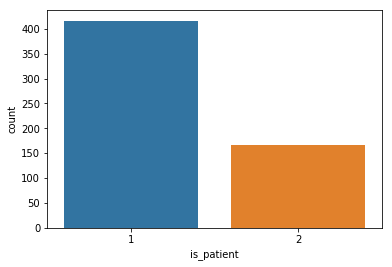

In [7]:
sns.countplot(data=liver_df, x = 'is_patient', label='Count')

LD, NLD = liver_df['is_patient'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)


Number of patients that are male:  441
Number of patients that are female:  142


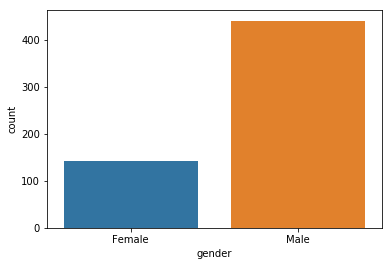

In [8]:
sns.countplot(data=liver_df, x = 'gender', label='Count')

M, F = liver_df['gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)


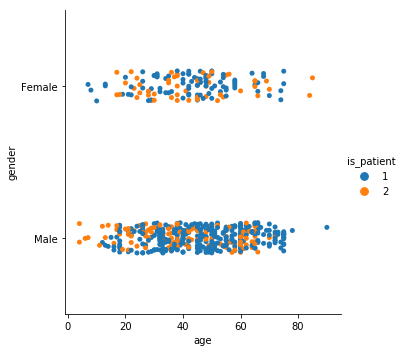

In [9]:
sns.catplot(x="age", y="gender", hue="is_patient", data=liver_df);


/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


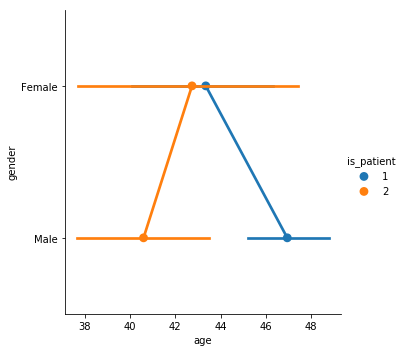

In [10]:
sns.factorplot(x="age", y="gender", hue="is_patient", data=liver_df);



Age seems to be a factor for liver disease for both male and female genders

In [11]:
liver_df[['gender', 'is_patient','age']].groupby(['is_patient','gender'], as_index=False).count().sort_values(by='is_patient', ascending=False)


,is_patient,gender,age
2,2,Female,50
3,2,Male,117
0,1,Female,92
1,1,Male,324


In [12]:
liver_df[['gender', 'is_patient','age']].groupby(['is_patient','gender'], as_index=False).mean().sort_values(by='is_patient', ascending=False)


,is_patient,gender,age
2,2,Female,42.740000
3,2,Male,40.598291
0,1,Female,43.347826
1,1,Male,46.950617


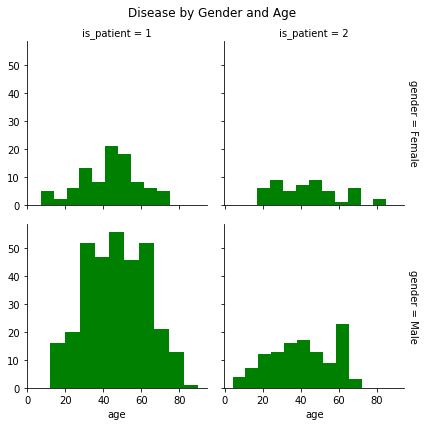

In [13]:
g = sns.FacetGrid(liver_df, col="is_patient", row="gender", margin_titles=True)
g.map(plt.hist, "age", color="green")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

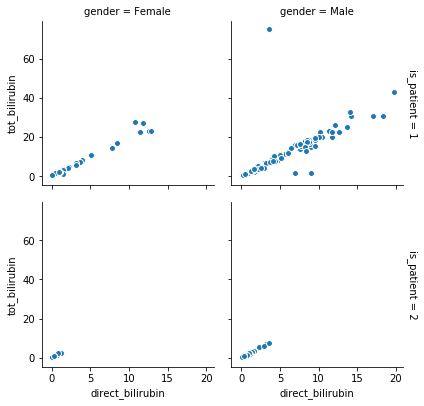

In [14]:
g = sns.FacetGrid(liver_df, col="gender", row="is_patient", margin_titles=True)
g.map(plt.scatter,"direct_bilirubin", "tot_bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)


There seems to be direct relationship between Total_Bilirubin and Direct_Bilirubin. We have the possibility of removing one of this feature.

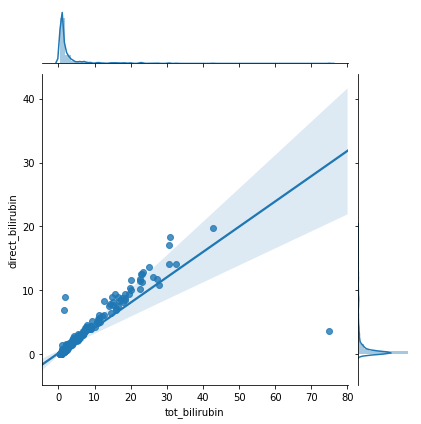

In [15]:
sns.jointplot("tot_bilirubin", "direct_bilirubin", data=liver_df, kind="reg")

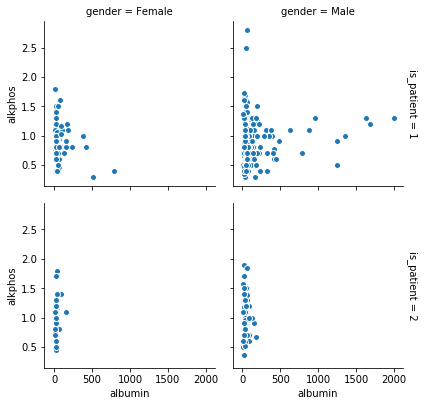

In [16]:
g = sns.FacetGrid(liver_df, col="gender", row="is_patient", margin_titles=True)
g.map(plt.scatter,"albumin", "alkphos",  edgecolor="w")
plt.subplots_adjust(top=0.9)

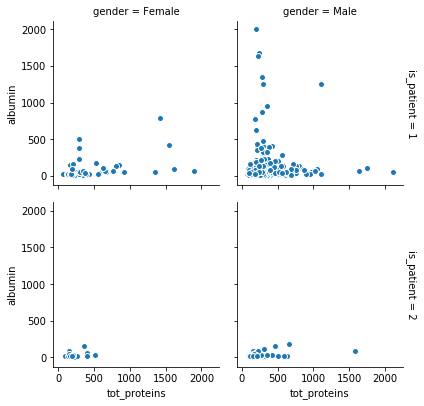

In [17]:
g = sns.FacetGrid(liver_df, col="gender", row="is_patient", margin_titles=True)
g.map(plt.scatter,"tot_proteins", "albumin",  edgecolor="w")
plt.subplots_adjust(top=0.9)


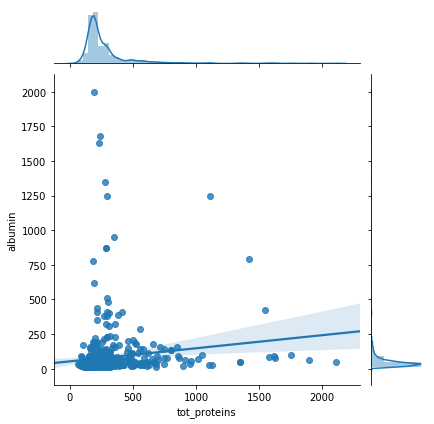

In [18]:
sns.jointplot("tot_proteins", "albumin", data=liver_df, kind="reg")

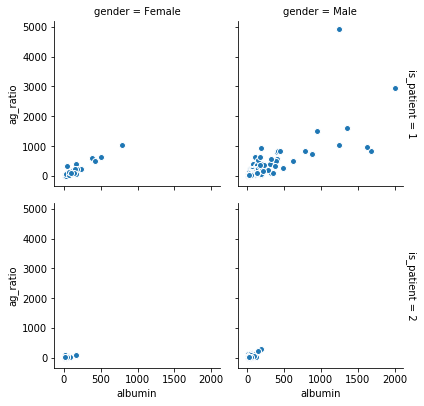

In [19]:
g = sns.FacetGrid(liver_df, col="gender", row="is_patient", margin_titles=True)
g.map(plt.scatter,"albumin", "ag_ratio",  edgecolor="w")
plt.subplots_adjust(top=0.9)

There is linear relationship between Albumin_and_Globulin_Ratio and Albumin. We have the possibility of removing one of this feature.



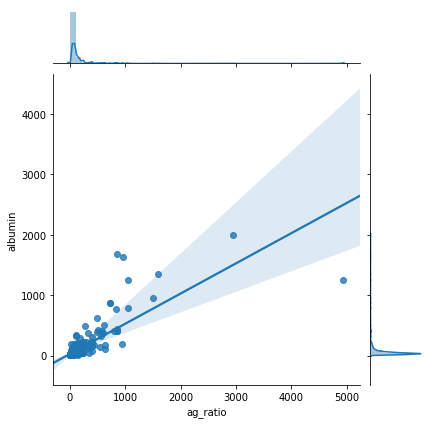

In [20]:
sns.jointplot("ag_ratio", "albumin", data=liver_df, kind="reg")


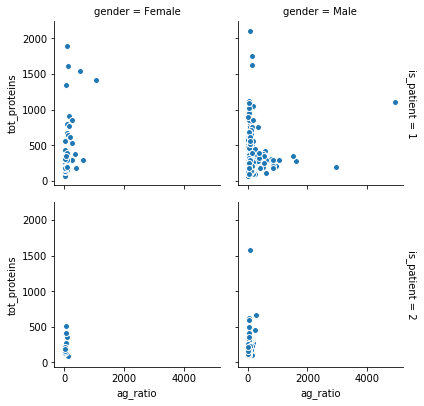

In [21]:
g = sns.FacetGrid(liver_df, col="gender", row="is_patient", margin_titles=True)
g.map(plt.scatter,"ag_ratio", "tot_proteins",  edgecolor="w")
plt.subplots_adjust(top=0.9)


From the above jointplots and scatterplots, we find direct relationship between the following features:
Direct_Bilirubin & Total_Bilirubin,
Total_Protiens & Albumin,
Albumin_and_Globulin_Ratio & Albumin.

Hence, we can very well find that we can omit one of the features.

Total_Bilirubin,
Total_Protiens,
Albumin_and_Globulin_Ratio,
Albumin.

In [22]:
liver_df.head(3)

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1


Convert categorical variable "Gender" to indicator variables


In [23]:
pd.get_dummies(liver_df['gender'], prefix = 'gender').head()

,gender_Female,gender_Male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [24]:
liver_df = pd.concat([liver_df,pd.get_dummies(liver_df['gender'], prefix = 'gender')], axis=1)


In [25]:
liver_df


,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient,gender_Female,gender_Male
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1,0,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1,1,0
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1,1,0
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2,0,1
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1,0,1


In [26]:
liver_df.describe()


,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient,gender_Female,gender_Male
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449,0.243568,0.756432
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490,0.429603,0.429603
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000,0.000000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000,0.000000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000,0.000000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000,0.000000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000,1.000000,1.000000


In [27]:
liver_df[liver_df['alkphos'].isnull()]


,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient,gender_Female,gender_Male
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1,1,0
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1,0,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2,1,0
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2,0,1


In [28]:
liver_df["alkphos"] = liver_df.ag_ratio.fillna(liver_df['alkphos'].mean())
liver_df.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient,gender_Female,gender_Male
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,18,1,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,100,1,0,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,68,1,0,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,20,1,0,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,59,1,0,1


The input variables/features are all the inputs except is_patient. The prediction or label is 'is_patient' that determines whether the patient has liver disease or not. 

In [29]:
X = liver_df.drop(['gender','is_patient'], axis=1)
X.head(3)


,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,gender_Female,gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,18,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,100,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,68,0,1


1 for liver disease; 2 for no liver disease



In [30]:
y = liver_df['is_patient']  

In [31]:
# Finding Correlation...
liver_corr = X.corr()


In [32]:
liver_corr

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,gender_Female,gender_Male
age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.019910,-0.056560,0.056560
tot_bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,0.237831,-0.089291,0.089291
direct_bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,0.257544,-0.100436,0.100436
tot_proteins,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,0.167196,0.027496,-0.027496
albumin,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,0.791966,-0.082332,0.082332
ag_ratio,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,1.000000,-0.080336,0.080336
sgpt,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,-0.025645,0.089121,-0.089121
sgot,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,-0.085290,0.093799,-0.093799
alkphos,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,1.000000,-0.080336,0.080336
gender_Female,-0.056560,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,-0.080336,1.000000,-1.000000


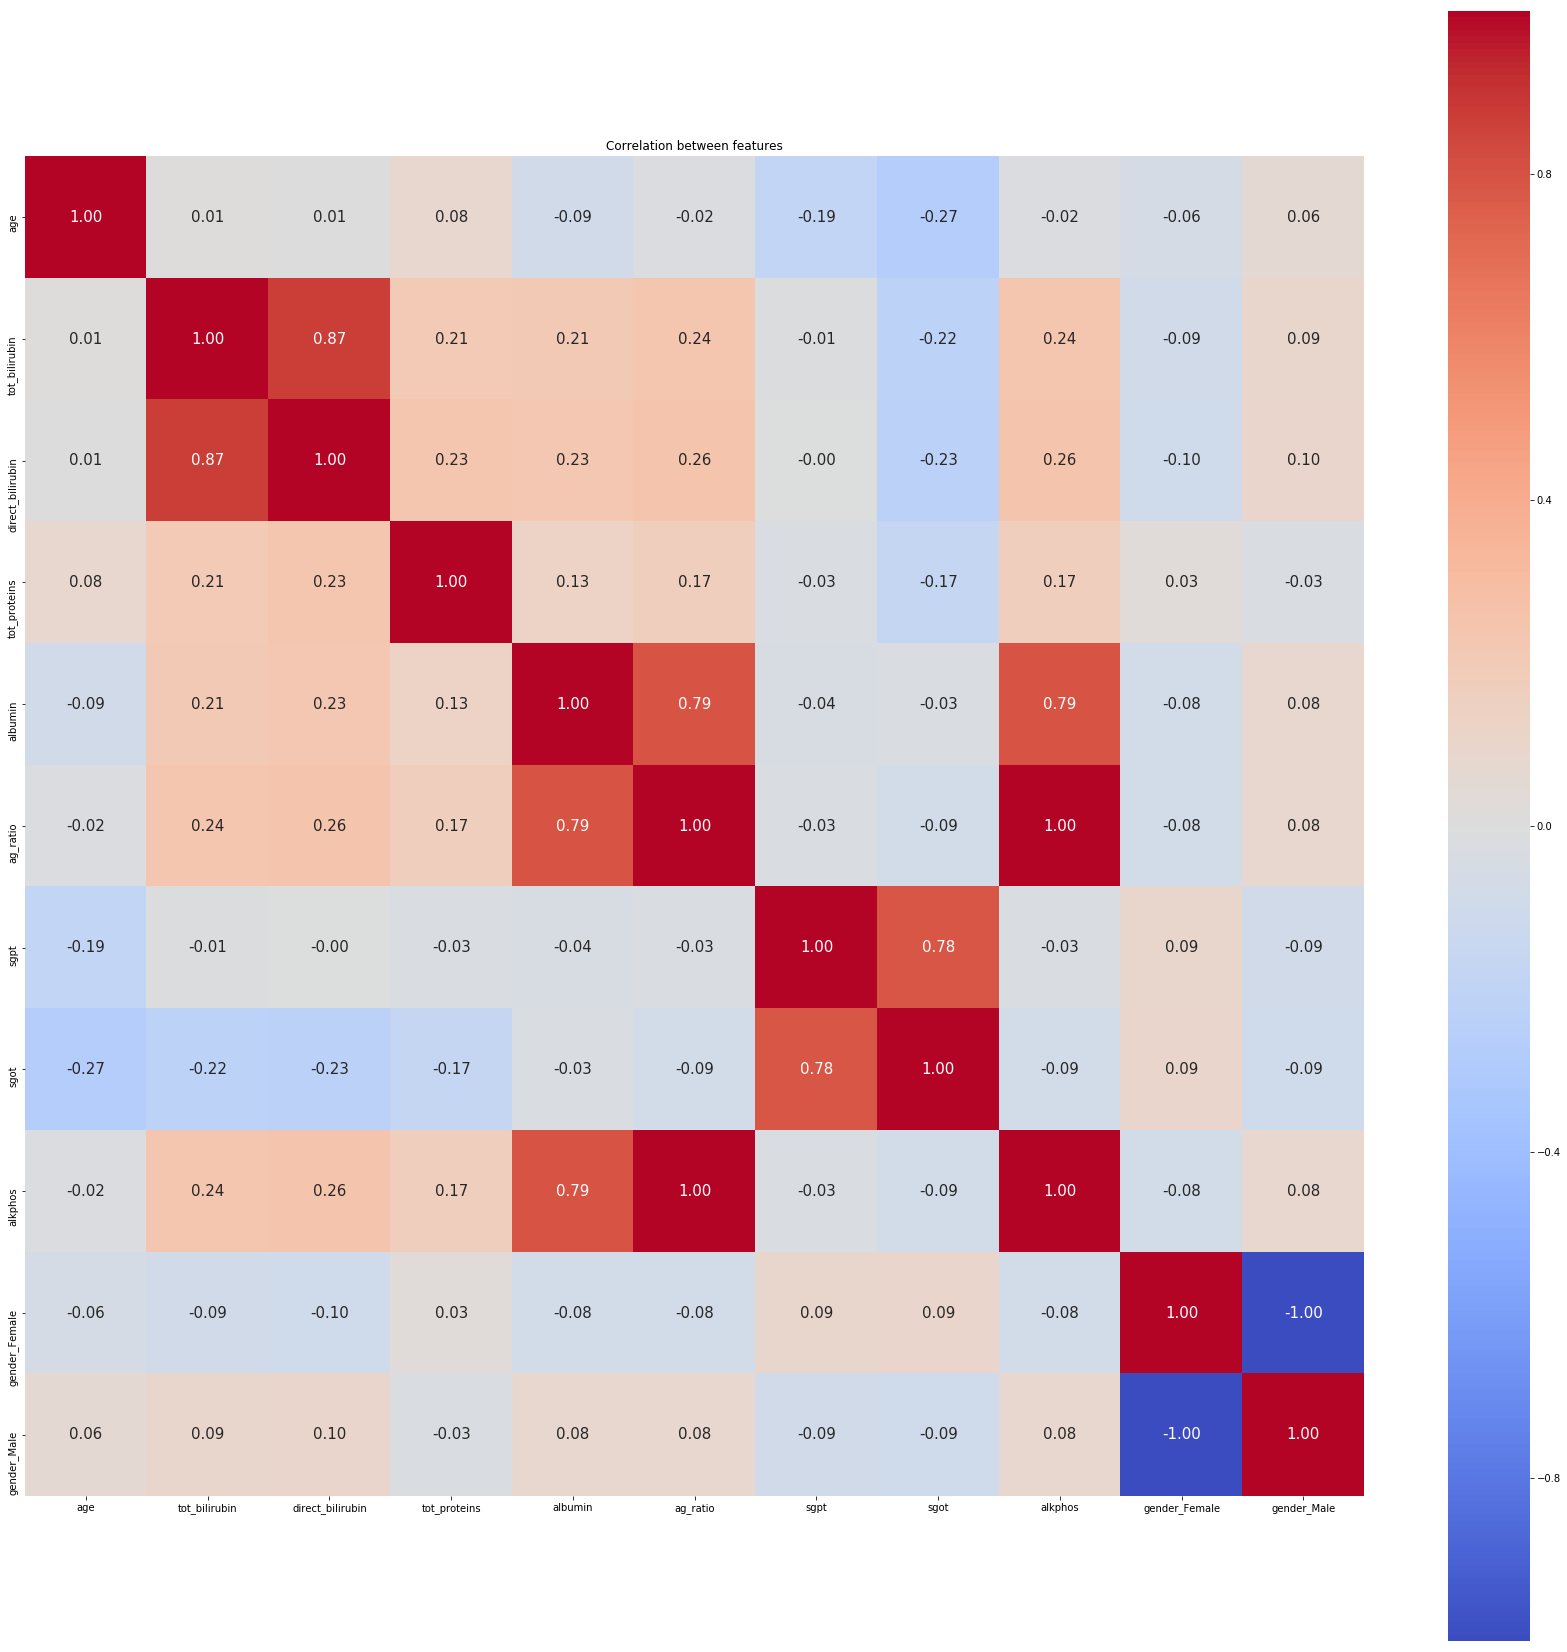

In [33]:
plt.figure(figsize=(30, 30))
sns.heatmap(liver_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features');


From the above Heatmap we can say that there is a high correlation between
Total_Proteins & Albumin
Direct_Bilirubin & Total_Bilirubin
There is some correlation between Albumin_and_Globulin_Ratio and Albumin. But its not as high as Total_Protiens & Albumin


# Machine Learning

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(408, 11)
(408,)
(175, 11)
(175,)


Logistic Regression Training Score: 
 74.02
Logistic Regression Test Score: 
 68.0
Coefficient: 
 [[-0.01201708 -0.02748785 -0.46818268 -0.00101455 -0.01083758 -0.00133558
  -0.33232126  0.57511275 -0.00133558  0.55074892  0.32339722]]
Intercept: 
 [0.87414613]
Accuracy: 
 0.68
Confusion Matrix: 
 [[107  17]
 [ 39  12]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.73      0.86      0.79       124
           2       0.41      0.24      0.30        51

   micro avg       0.68      0.68      0.68       175
   macro avg       0.57      0.55      0.55       175
weighted avg       0.64      0.68      0.65       175



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


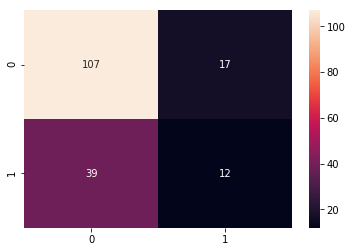

In [36]:
#2) Logistic Regression
# Create logistic regression object
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train, y_train)
#Predict Output
log_predicted= logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")

In [37]:
coeff_df = pd.DataFrame(X.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
7,sgot,0.575113
9,gender_Female,0.550749
10,gender_Male,0.323397
3,tot_proteins,-0.001015
5,ag_ratio,-0.001336
8,alkphos,-0.001336
4,albumin,-0.010838
0,age,-0.012017
1,tot_bilirubin,-0.027488
6,sgpt,-0.332321


Gaussian Score: 
 55.88
Gaussian Test Score: 
 52.0
Accuracy: 
 0.52
[[42 82]
 [ 2 49]]
              precision    recall  f1-score   support

           1       0.95      0.34      0.50       124
           2       0.37      0.96      0.54        51

   micro avg       0.52      0.52      0.52       175
   macro avg       0.66      0.65      0.52       175
weighted avg       0.79      0.52      0.51       175



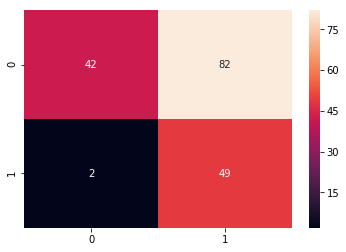

In [38]:
#Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
#Predict Output
gauss_predicted = gaussian.predict(X_test)

gauss_score = round(gaussian.score(X_train, y_train) * 100, 2)
gauss_score_test = round(gaussian.score(X_test, y_test) * 100, 2)
print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print('Accuracy: \n', accuracy_score(y_test, gauss_predicted))
print(confusion_matrix(y_test,gauss_predicted))
print(classification_report(y_test,gauss_predicted))

sns.heatmap(confusion_matrix(y_test,gauss_predicted),annot=True,fmt="d")

In [39]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
#Predict Output
rf_predicted = random_forest.predict(X_test)

random_forest_score = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test, y_test) * 100, 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))

Random Forest Score: 
 100.0
Random Forest Test Score: 
 70.29
Accuracy: 
 0.7028571428571428
[[102  22]
 [ 30  21]]
              precision    recall  f1-score   support

           1       0.77      0.82      0.80       124
           2       0.49      0.41      0.45        51

   micro avg       0.70      0.70      0.70       175
   macro avg       0.63      0.62      0.62       175
weighted avg       0.69      0.70      0.69       175



# Model Evaluation

In [40]:
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'Gaussian Naive Bayes','Random Forest'],
    'Score': [ logreg_score, gauss_score, random_forest_score],
    'Test Score': [ logreg_score_test, gauss_score_test, random_forest_score_test]})
models.sort_values(by='Test Score', ascending=False)


,Model,Score,Test Score
2,Random Forest,100.00,70.29
0,Logistic Regression,74.02,68.00
1,Gaussian Naive Bayes,55.88,52.00


In [41]:
linear = linear_model.LinearRegression()
# Train the model using the training sets and check score
linear.fit(X_train, y_train)
#Predict Output
lin_predicted = linear.predict(X_test)

linear_score = round(linear.score(X_train, y_train) * 100, 2)
linear_score_test = round(linear.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Linear Regression Score: \n', linear_score)
print('Linear Regression Test Score: \n', linear_score_test)
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

from sklearn.feature_selection import RFE
rfe =RFE(linear, n_features_to_select=3)
rfe.fit(X,y)


Linear Regression Score: 
 13.06
Linear Regression Test Score: 
 8.71
Coefficient: 
 [-2.55984159e-03 -5.65257506e-04 -2.16330321e-02 -2.22329343e-04
 -3.99136232e-04  3.20281153e-05 -6.95619361e-02  1.16214822e-01
  3.20281153e-05  4.50805686e-02 -4.50805686e-02]
Intercept: 
 1.6403114508874606


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=3, step=1, verbose=0)

In [42]:
for i in range(len(rfe.ranking_)):
    if rfe.ranking_[i] == 1:
        print(X.columns.values[i])

sgpt
sgot
gender_Female


In [43]:
finX = liver_df[['sgpt','sgot', 'gender_Female']]
finX.head(4)

,sgpt,sgot,gender_Female
0,6.8,3.3,1
1,7.5,3.2,0
2,7.0,3.3,0
3,6.8,3.4,0


In [44]:
X_train, X_test, y_train, y_test = train_test_split(finX, y, test_size=0.30, random_state=101)


Logistic Regression Training Score: 
 71.32
Logistic Regression Test Score: 
 71.43
Coefficient: 
 [[-0.63002616  1.10669027  0.53378136]]
Intercept: 
 [-0.48447194]
Accuracy: 
 0.7142857142857143
Confusion Matrix: 
 [[120   4]
 [ 46   5]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.72      0.97      0.83       124
           2       0.56      0.10      0.17        51

   micro avg       0.71      0.71      0.71       175
   macro avg       0.64      0.53      0.50       175
weighted avg       0.67      0.71      0.63       175



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


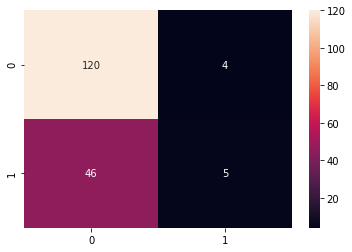

In [45]:
#Logistic Regression
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train, y_train)
#Predict Output
log_predicted= logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")

In [49]:
import pickle
filename = 'indian_liver_patient.py'
pickle.dump(models,open(filename,'wb'))

In [50]:
model = pickle.load(open(filename,'rb'))